In [1]:
import pandas as pd
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

## Load the data

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# device = torch.device("cpu")
print("Device", device)

Device cuda


In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Take a quick view at the data

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

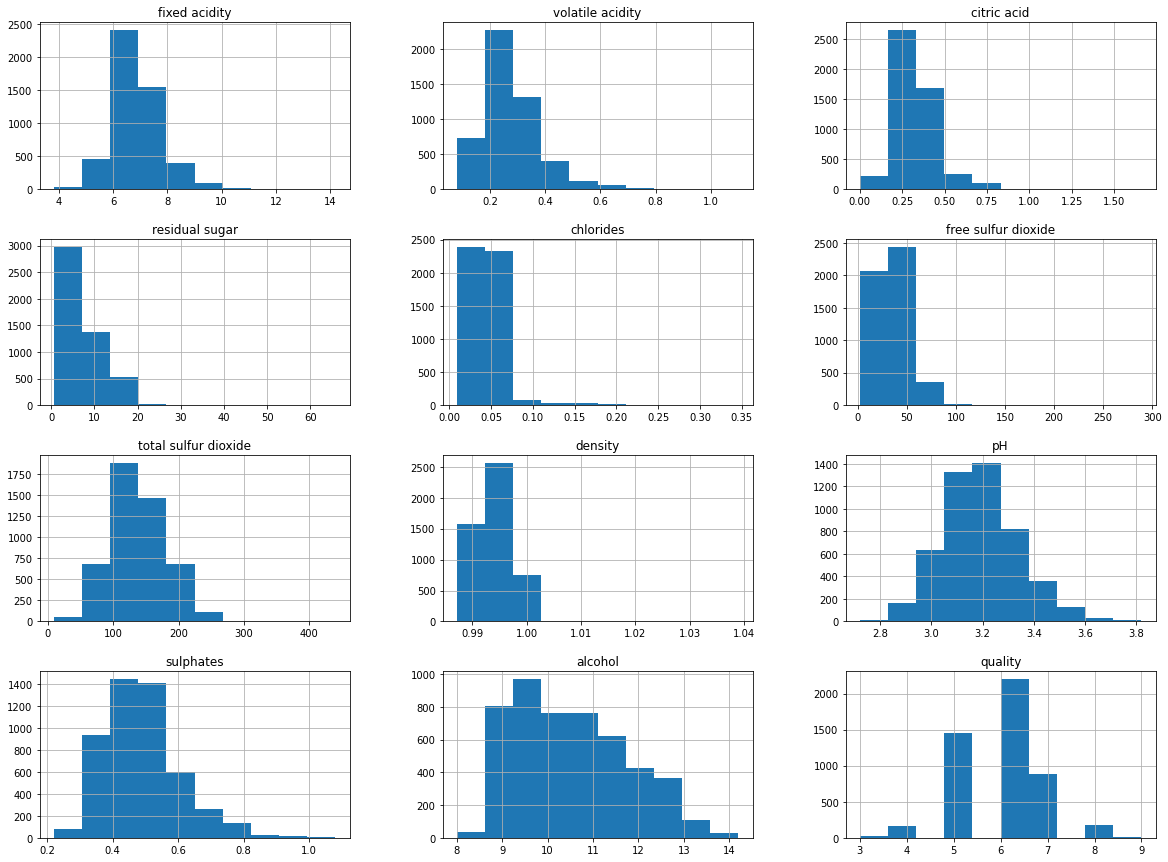

In [7]:
df.hist(figsize=(20,15))

### Correlation matrix

<AxesSubplot:>

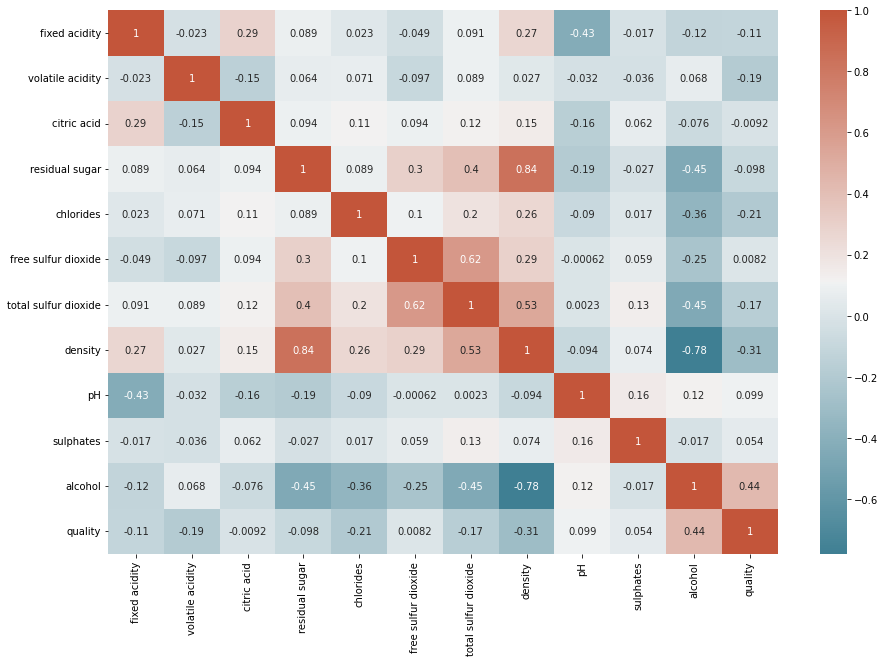

In [8]:
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Make quality from 0 to 6

In [9]:
df['quality'] = df['quality'] - 3

<AxesSubplot:xlabel='quality', ylabel='count'>

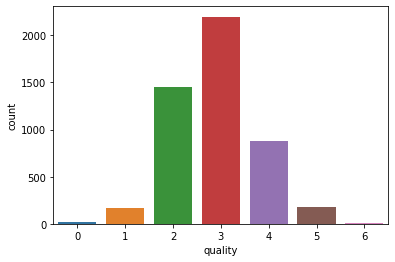

In [10]:
sns.countplot(x = 'quality', data=df)

## Make train and test dataset

In [11]:
train_df = df.sample(frac=0.8,random_state=200) #random state is a seed value
test_df = df.drop(train_df.index)

In [12]:
X_train = train_df.values[:, :-1]
y_train = train_df['quality'].to_numpy()

In [13]:
X_test = test_df.values[:, :-1]
y_test = test_df['quality'].to_numpy()

In [14]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

## Compute class weights

In [15]:
all_label_ids = torch.tensor(df['quality'], dtype=torch.long)

In [16]:
all_label_ids

tensor([3, 3, 3,  ..., 3, 4, 3])

In [17]:
labels_unique, counts = np.unique(df['quality'], return_counts=True)
labels_unique, counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  20,  163, 1457, 2198,  880,  175,    5]))

In [18]:
class_weights = 1./torch.tensor(counts, dtype=torch.float) 
class_weights

tensor([0.0500, 0.0061, 0.0007, 0.0005, 0.0011, 0.0057, 0.2000])

In [19]:
example_weights = [class_weights[e] for e in y_train]

In [20]:
weighted_sampler = data.WeightedRandomSampler(
    weights=example_weights,
    num_samples=len(example_weights),
    replacement=True
)

In [21]:
train_dataset = data.TensorDataset(torch.from_numpy(X_train),torch.from_numpy(y_train))
train_data_loader = data.DataLoader(train_dataset, batch_size=32, sampler=weighted_sampler)
next(iter(train_dataset))

(tensor([2.0737e-02, 8.1855e-04, 1.0095e-03, 4.3656e-03, 2.3738e-04, 7.3670e-02,
         4.8295e-01, 2.7132e-03, 8.4311e-03, 1.3643e-03, 2.6739e-02],
        dtype=torch.float64),
 tensor(2))

In [22]:
test_dataset = data.TensorDataset(torch.from_numpy(X_test),torch.from_numpy(y_test))
test_data_loader = data.DataLoader(test_dataset, batch_size=32, shuffle=True)
next(iter(test_dataset))

(tensor([1.8409e-02, 6.3636e-04, 9.0909e-04, 1.5682e-02, 1.1364e-04, 6.8182e-02,
         2.2045e-01, 2.2616e-03, 7.4091e-03, 1.0000e-03, 2.2955e-02],
        dtype=torch.float64),
 tensor(3))

In [51]:
class Network(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Network, self).__init__()
        
        self.layer_1 = nn.Linear(num_inputs, 512)
        self.layer_2 = nn.Linear(512, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_out = nn.Linear(128, num_outputs) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.batchnorm3 = nn.BatchNorm1d(128)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [52]:
model = Network(num_inputs=11, num_outputs=7)
model.to(device)

Network(
  (layer_1): Linear(in_features=11, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=7, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [53]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [54]:
loss_module = nn.CrossEntropyLoss(weight=torch.tensor(class_weights).to(device).float())

/tmp/ipykernel_34227/2777410197.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss_module = nn.CrossEntropyLoss(weight=torch.tensor(class_weights).to(device).float())


In [55]:
model.train() # Przełączenie modelu w tryb uczenia

# Training loop
for epoch in range(300):
    for data_inputs, data_labels in train_data_loader:
        ## Step 1: Move input data to device (only strictly necessary if we use GPU)
        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)
        
        ## Step 2: Run the model on the input data
        y_preds = model(data_inputs.float())
        
        ## Step 3: Calculate the loss
        loss = loss_module(y_preds.requires_grad_(True).float(), data_labels.type(torch.LongTensor).to(device))
        
        ## Step 4: Perform backpropagation
        optimizer.zero_grad() 
        
        loss.backward()

        ## Step 5: Update the parameters
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss: {loss.item():.3}")

Epoch: 0, loss: 0.291
Epoch: 10, loss: 0.0952
Epoch: 20, loss: 0.0561
Epoch: 30, loss: 0.0717
Epoch: 40, loss: 0.0725
Epoch: 50, loss: 0.0332
Epoch: 60, loss: 0.0743
Epoch: 70, loss: 0.0391
Epoch: 80, loss: 0.0437
Epoch: 90, loss: 0.0735
Epoch: 100, loss: 0.251
Epoch: 110, loss: 0.0334
Epoch: 120, loss: 0.369
Epoch: 130, loss: 0.0674
Epoch: 140, loss: 0.0415
Epoch: 150, loss: 0.0708
Epoch: 160, loss: 0.0197
Epoch: 170, loss: 0.224
Epoch: 180, loss: 0.071
Epoch: 190, loss: 0.536
Epoch: 200, loss: 0.0136
Epoch: 210, loss: 0.514
Epoch: 220, loss: 0.0133
Epoch: 230, loss: 0.0164
Epoch: 240, loss: 0.0318
Epoch: 250, loss: 0.186
Epoch: 260, loss: 0.049
Epoch: 270, loss: 0.0232
Epoch: 280, loss: 0.019
Epoch: 290, loss: 0.0157


In [56]:
model.eval() # Set model to eval mode
true_preds, num_preds = 0., 0.
y_pred_list = []

with torch.no_grad(): # Deactivate gradients for the following code
    for data_inputs, data_labels in test_data_loader:

        # Determine prediction of model on dev set
        data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
        y_preds = model(data_inputs.float())
        
        # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
        _, y_pred_tags = torch.max(y_preds, dim = 1)
        true_preds += (y_pred_tags.float() == data_labels.float()).sum()
        print(y_pred_tags, data_labels)
        num_preds += data_labels.shape[0]

acc = true_preds / num_preds
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

tensor([2, 2, 2, 3, 1, 4, 2, 2, 2, 2, 3, 5, 2, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2, 1,
        3, 2, 1, 1, 1, 2, 1, 1], device='cuda:0') tensor([2, 2, 2, 3, 2, 3, 3, 3, 3, 0, 1, 4, 2, 2, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2,
        3, 3, 4, 2, 2, 4, 2, 3], device='cuda:0')
tensor([2, 3, 2, 2, 3, 1, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
        2, 1, 3, 2, 2, 3, 2, 2], device='cuda:0') tensor([3, 4, 5, 2, 4, 2, 2, 4, 2, 2, 3, 2, 4, 4, 3, 3, 1, 2, 1, 2, 3, 3, 2, 4,
        1, 2, 3, 4, 2, 3, 4, 3], device='cuda:0')
tensor([2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 0,
        1, 2, 2, 2, 1, 1, 2, 1], device='cuda:0') tensor([3, 2, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 3, 3,
        3, 3, 2, 4, 3, 3, 2, 1], device='cuda:0')
tensor([3, 4, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 3, 5, 2, 1, 2, 2, 1, 2, 2, 4, 2, 2,
        5, 3, 2, 2, 3, 4, 2, 0], device='cuda:0') tensor([3, 4, 3, 3, 3, 3, 4, 3, 2, 1, 2, 3, 4, 3, 3, 2, 3, 2, 4, 2, 2, 3, 1, 2,
        3,